In [1]:
# Import other libraries
from IPython.display import display
import numpy as np
import pandas as pd
import pyarrow
import os

# Import sklearn tools
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.preprocessing import * 

# Import files
from helpers import *
from cross_validation import *
from models import *
from dataloader import *
from dataprocess import *
from plot import *

# Autoreload
%load_ext autoreload
%autoreload 2

In [2]:
classifier = 'hydro'
data_set, classes = load_data_sets(classifier = classifier)

In [3]:
X, y = processing(data_set, classes, classifier)

In [4]:
display(X.shape)

(1896, 68)

In [5]:
# Get a train and test set for modelization
k_fold = 5
seed = 0
X_train, y_train, X_test, y_test = split_data(X, y, kfold = k_fold, seed = seed)

In [6]:
# Feature selection
method = 'lassoCV'
model_feat_selec = get_model_features_selection(X_train, y_train, method, k_fold, seed = seed)

MESSAGE : param is the number of folds for cross validation (should be an int)


/Users/gaspardvilla/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22538668916934057, tolerance: 0.20884521452145202
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gaspardvilla/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3108506912631128, tolerance: 0.20884521452145202
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gaspardvilla/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49019428726444403, tolerance: 0.20884521452145202
  model = cd_fast.enet_coordinate_descent_gram(
/Users/gaspardvilla/opt/an

In [7]:
# Select the good features
X_train_reduce = feature_transform(model_feat_selec, X_train, method)
X_test_reduce = feature_transform(model_feat_selec, X_test, method)

In [8]:
# Oversampling
X_train_reduce, y_train = smote_data_augmentation(X_train_reduce, y_train, seed = seed)

In [9]:
verbose = 2

In [ ]:
# MLR model
MLR, param = get_model_MLR(seed = seed)
cv_MLR = evaluate_model(MLR, 
                        param, 
                        X_train_reduce, 
                        y_train, 
                        X_test_reduce, 
                        y_test, 
                        verbosity = verbose)

# Save best model
path = 'Models/trained_model/'+str(classifier)+'_MLR.pkl'
save_model(path, cv_MLR)

In [ ]:
X_train_reduce.shape

In [ ]:
# SVM model
SVM, param = get_model_SVM(seed = seed)
cv_SVM = evaluate_model(SVM, 
                        param, 
                        X_train_reduce, 
                        y_train, X_test_reduce, 
                        y_test, 
                        verbosity = verbose)

# Save best model
path = 'Models/trained_model/'+str(classifier)+'_SVM.pkl'
save_model(path, cv_SVM)

In [ ]:
# SVM poly model
SVM, param = get_model_SVM(poly = True, seed = seed)
cv_SVM_poly = evaluate_model(SVM, 
                        param, 
                        X_train_reduce, 
                        y_train, X_test_reduce, 
                        y_test, 
                        verbosity = verbose)

# Save best model
path = 'Models/trained_model/'+str(classifier)+'_SVM_poly.pkl'
save_model(path, cv_SVM_poly)

In [ ]:
# RF model
RF, param = get_model_RF(seed = seed)
cv_RF = evaluate_model(RF, 
                        param, 
                        X_train_reduce, 
                        y_train, X_test_reduce, 
                        y_test, 
                        verbosity = verbose)

# Save best model
path = 'Models/trained_model/'+str(classifier)+'_RF.pkl'
save_model(path, cv_RF)

In [ ]:
# MLP model
MLP, param = get_model_MLP(seed = seed)
cv_MLP = evaluate_model(MLP, 
                        param, 
                        X_train_reduce, 
                        y_train, X_test_reduce, 
                        y_test, 
                        verbosity = verbose)

# Save best model
path = 'Models/trained_model/'+str(classifier)+'_MLP.pkl'
save_model(path, cv_MLP)

# RUN

***

In [ ]:
train, test = all_models_train_and_test()

# Features importance graph
 
***

/Users/gaspardvilla/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)
/Users/gaspardvilla/Documents/EPFL/5ème année/Semestre IX/Machine Learning/ML-Project/Project 2/Snowfalkes/plot_MA.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  importance['color'][geometry_list] = geom_color
/Users/gaspardvilla/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

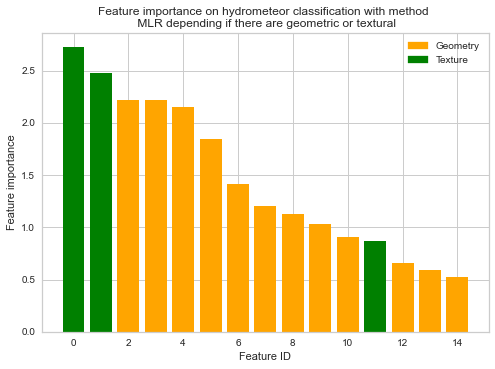

Feature ID
                      FeatureID
local_intens                  0
intensity_mean                1
ell_in_B                      2
sym_mean                      3
quality_xhi                   4
skel_perim_ratio              5
convexity                     6
sym_Pmax_id                   7
sym_P2                        8
sym_std_mean_ratio            9
skel_area_ratio              10
hist_entropy                 11
area_porous                  12
frac_dim_theoretical         13
area                         15


In [20]:
model = best_model(classifier+'_MLR')
model.fit(X_train_reduce, y_train)
title = 'Feature importance on hydrometeor classification with method \n MLR depending if there are geometric or textural'
plot_feature_importance(model, classifier+'_MLR.png', title)

# Confrontation matrix

***

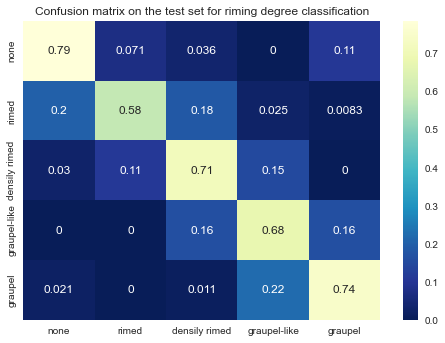

In [10]:
model = best_model(classifier+'_MLR')
model.fit(X_train_reduce, y_train)
title = 'Confusion matrix on the test set for hydrometeor classification'
plot_conf_matrix(classifier, model, X_test_reduce, y_test, classifier+'_MLR_conf.png', title)